## Current Daily Price of Various Commodities from Various Markets Analysis

In [14]:
# Step 1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset for analysis and Converting all commodity names to lowercase and removing extra spaces.


In [15]:
# Reading the dataset for analysis 
df = pd.read_excel("project_dataset.xlsx", sheet_name="in")

# Converting all commodity names to lowercase and removing extra spaces
df['Commodity'] = df['Commodity'].str.strip().str.lower()

## Showing the user all unique commodities available in the dataset, Getting user input and Checking if input is valid or not.



In [16]:
# Showing the user all unique commodities available in the dataset
all_commodities = sorted(df['Commodity'].unique())
print("Available Commodities:")
print(", ".join(all_commodities))

# Getting user input
user_input = input("\nEnter a commodity to analyze: ").strip().lower()

# Checking if input is valid or not
if user_input not in all_commodities:
    print("Invalid commodity entered. Please check the spelling or try one from the list above.")
else:
    print(f"Analyzing commodity: {user_input}")


Available Commodities:
amaranthus, amla(nelli kai), amphophalus, amranthas red, apple, arhar (tur/red gram)(whole), arhar dal(tur dal), ashgourd, bajra(pearl millet/cumbu), banana, banana - green, barley (jau), beans, beetroot, bengal gram dal (chana dal), bengal gram(gram)(whole), ber(zizyphus/borehannu), betal leaves, bhindi(ladies finger), bitter gourd, black gram (urd beans)(whole), black gram dal (urd dal), bottle gourd, brinjal, cabbage, capsicum, carrot, cauliflower, chikoos(sapota), chili red, chilly capsicum, chow chow, cluster beans, cock, coconut, coconut seed, colacasia, coriander(leaves), cotton, cowpea (lobia/karamani), cowpea(veg), cucumbar(kheera), cummin seed(jeera), custard apple (sharifa), drumstick, elephant yam (suran), field pea, fig(anjura/anjeer), firewood, fish, french beans (frasbean), garlic, ginger(dry), ginger(green), grapes, green avare (w), green chilli, green gram dal (moong dal), green peas, groundnut, guar, guava, gur(jaggery), indian beans (seam), jac

## Objective 1: Most Popular Commodity by State
In this objective, we will determine the most popular commodity in each state based on the number of occurrences.



Objective 1: Most Popular Commodity by State
                State               Commodity  Count
1      Andhra Pradesh                  tomato      3
15              Assam                 pumpkin      4
17              Bihar                   onion      4
25         Chandigarh                peas wet      1
28        Chattisgarh                   maize      1
47            Gujarat  pointed gourd (parval)      2
87            Haryana                  potato     12
101  Himachal Pradesh                 raddish      1
103         Karnataka                   maize      1
110            Kerala                  banana     22
183    Madhya Pradesh                   wheat    162
205       Maharashtra            green chilli      9
236      NCT of Delhi       coriander(leaves)      1
258            Odisha                  tomato      8
284            Punjab                  potato      8
292         Rajasthan                 mustard      2
303        Tamil Nadu   bhindi(ladies finger)    139


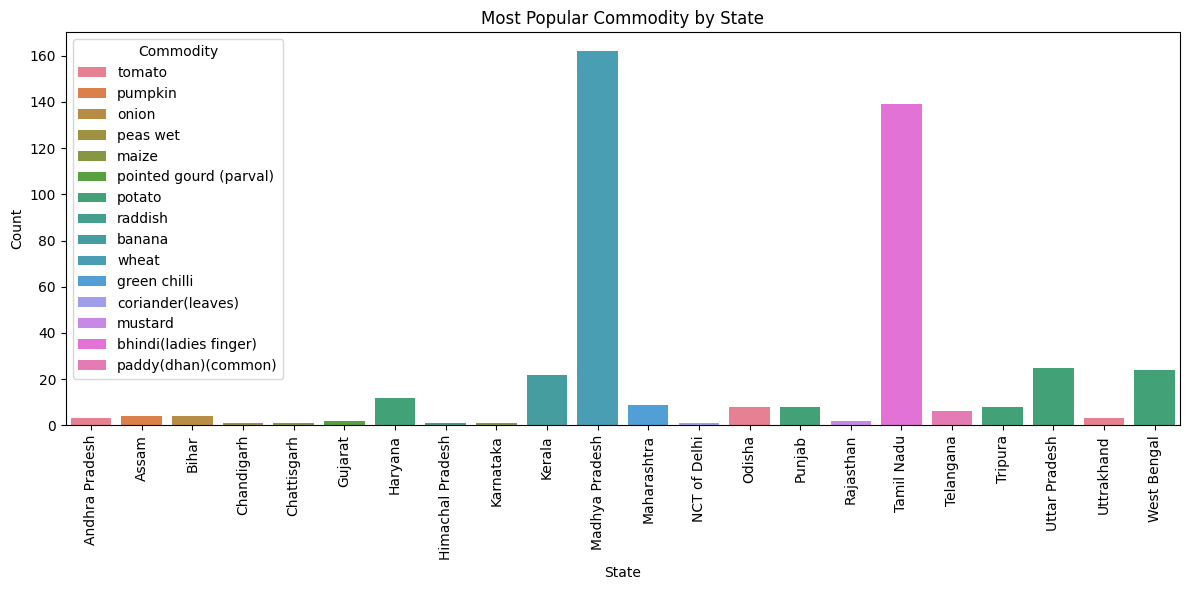

In [17]:
state_commodity_counts = df.groupby(['State', 'Commodity']).size().reset_index(name='Count')
most_popular_by_state = state_commodity_counts.sort_values('Count', ascending=False).drop_duplicates('State')
most_popular_by_state = most_popular_by_state.sort_values('State')
print("\nObjective 1: Most Popular Commodity by State")
print(most_popular_by_state)

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(data=most_popular_by_state, x='State', y='Count', hue='Commodity')
plt.title('Most Popular Commodity by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Objective 2: Price Variation for Selected Commodity
Here, we will analyze the price variation for the commodity selected by the user across different states, including minimum, maximum, and modal prices.


Objective 2: Price Variation for 'Apple' Across States
              Min_x0020_Price          Max_x0020_Price           \
                          min      max             min      max   
State                                                             
Haryana                5000.0  10000.0          6500.0  15000.0   
Kerala                14800.0  19800.0         15000.0  20000.0   
Maharashtra            3500.0  12000.0         12000.0  15000.0   
Punjab                 7500.0  20000.0          7600.0  23000.0   
Tamil Nadu            18000.0  22000.0         18000.0  24000.0   
Tripura               10000.0  10000.0         12000.0  12000.0   
Uttar Pradesh          3210.0   9400.0          4000.0   9600.0   

              Modal_x0020_Price                    
                            min      max     mode  
State                                              
Haryana                  6500.0  11000.0   6500.0  
Kerala                  15000.0  20000.0  15000.0  
Maharashtra  

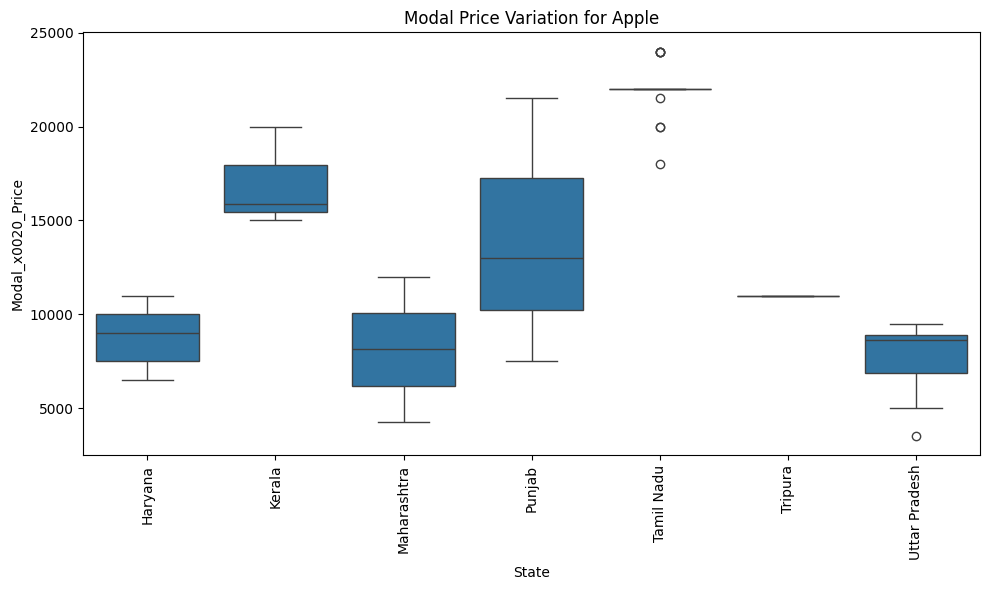

In [18]:
selected = df[df['Commodity'] == user_input]
price_variation = selected.groupby('State')[['Min_x0020_Price', 'Max_x0020_Price', 'Modal_x0020_Price']].agg(['min', 'max'])
mode_prices = selected.groupby('State')['Modal_x0020_Price'].apply(lambda x: x.mode().iloc[0])  
price_variation['Modal_x0020_Price', 'mode'] = mode_prices

print(f"\nObjective 2: Price Variation for '{user_input.title()}' Across States")
print(price_variation)

plt.figure(figsize=(10,6))
sns.boxplot(data=selected, x='State', y='Modal_x0020_Price')
plt.title(f'Modal Price Variation for {user_input.title()}')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Objective 3: Highest and Lowest Priced Commodities
In this objective, we will identify the highest and lowest-priced commodities based on their modal price.


Objective 3: Highest and Lowest Priced Commodities
Highest:
    Commodity  Modal_x0020_Price
69    kakada            68000.0
Lowest:
    Commodity  Modal_x0020_Price
48  firewood              320.0


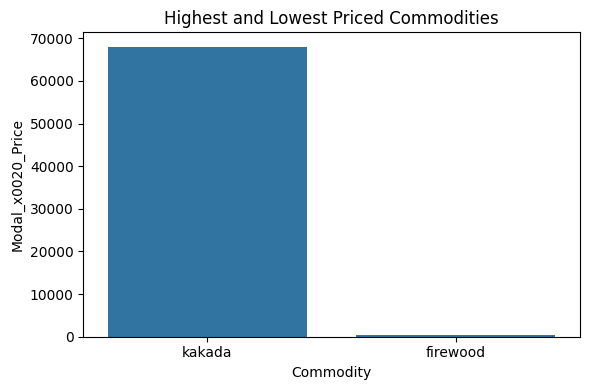

In [19]:
modal_prices = df.groupby('Commodity')['Modal_x0020_Price'].mean().reset_index()
highest = modal_prices.sort_values('Modal_x0020_Price', ascending=False).head(1)
lowest = modal_prices.sort_values('Modal_x0020_Price', ascending=True).head(1)
print("\nObjective 3: Highest and Lowest Priced Commodities")
print("Highest:\n", highest)
print("Lowest:\n", lowest)

plt.figure(figsize=(6,4))
sns.barplot(data=pd.concat([highest, lowest]), x='Commodity', y='Modal_x0020_Price')
plt.title('Highest and Lowest Priced Commodities')
plt.tight_layout()
plt.show()


## Objective 4: Market Distribution by State
This objective calculates the number of unique markets present in each state and visualizes the distribution.


Objective 4: Market Distribution by State
State
Tamil Nadu          168
Madhya Pradesh      145
Uttar Pradesh        40
West Bengal          23
Haryana              22
Maharashtra          14
Kerala               13
Telangana            12
Punjab               11
Tripura              10
Odisha                9
Uttrakhand            7
Bihar                 5
Assam                 5
Chattisgarh           4
Gujarat               4
Andhra Pradesh        4
Rajasthan             2
Chandigarh            1
NCT of Delhi          1
Himachal Pradesh      1
Karnataka             1
Name: Market, dtype: int64


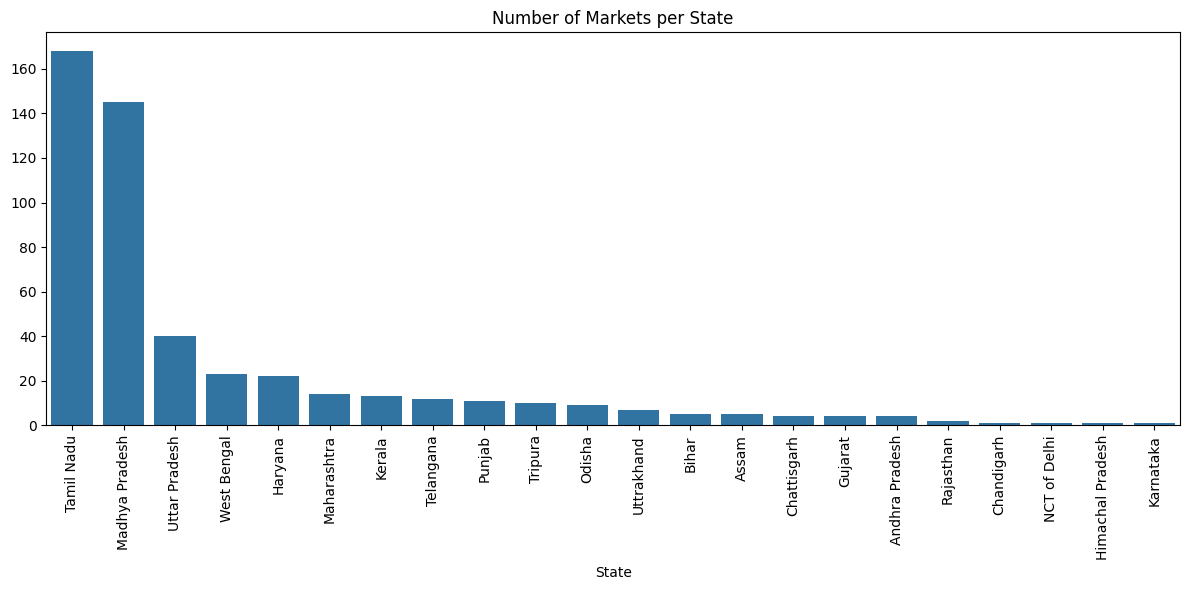

In [20]:
market_counts = df.groupby('State')['Market'].nunique().sort_values(ascending=False)
print("\nObjective 4: Market Distribution by State")
print(market_counts)

plt.figure(figsize=(12,6))
sns.barplot(x=market_counts.index, y=market_counts.values)
plt.title('Number of Markets per State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Objective 5: Grade Distribution
This objective analyzes the distribution of grades in the dataset.


Objective 5: Grade Distribution
Grade
Local      5515
FAQ        1177
Non-FAQ     164
Medium      113
Large        54
Small         7
Name: count, dtype: int64


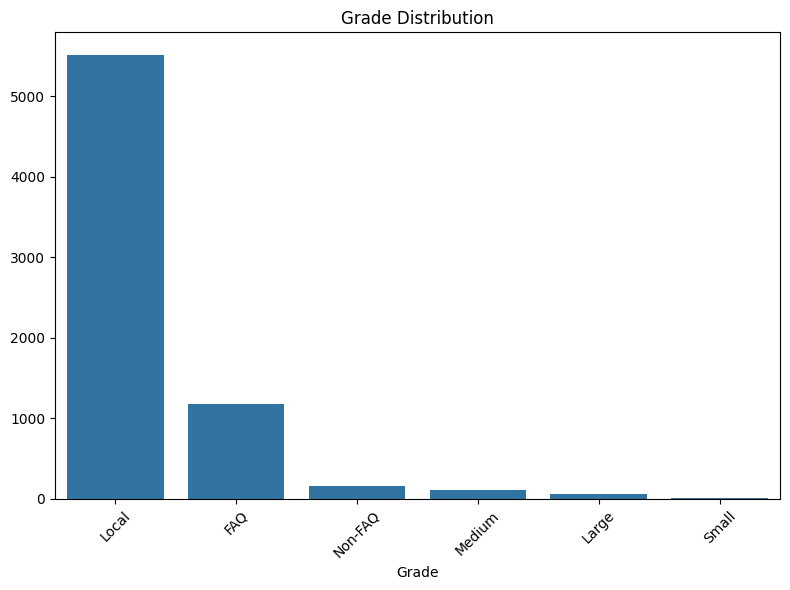

In [21]:
grade_distribution = df['Grade'].value_counts()
print("\nObjective 5: Grade Distribution")
print(grade_distribution)

plt.figure(figsize=(8,6))
sns.barplot(x=grade_distribution.index, y=grade_distribution.values)
plt.title('Grade Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Objective 6: Commodity Diversity by Market
This objective analyzes how diverse the markets are in terms of the number of commodities available in each market.


Objective 6: Commodity Diversity by Market
Market
Tiruvannamalai(Uzhavar Sandhai )     53
Athur(Uzhavar Sandhai )              53
Kahithapattarai(Uzhavar Sandhai )    52
Anna nagar(Uzhavar Sandhai )         52
Thathakapatti(Uzhavar Sandhai )      51
Hosur(Uzhavar Sandhai )              50
Vellore                              50
RSPuram(Uzhavar Sandhai )            49
Ranipettai(Uzhavar Sandhai )         48
Thanjavur(Uzhavar Sandhai )          48
Name: Commodity, dtype: int64


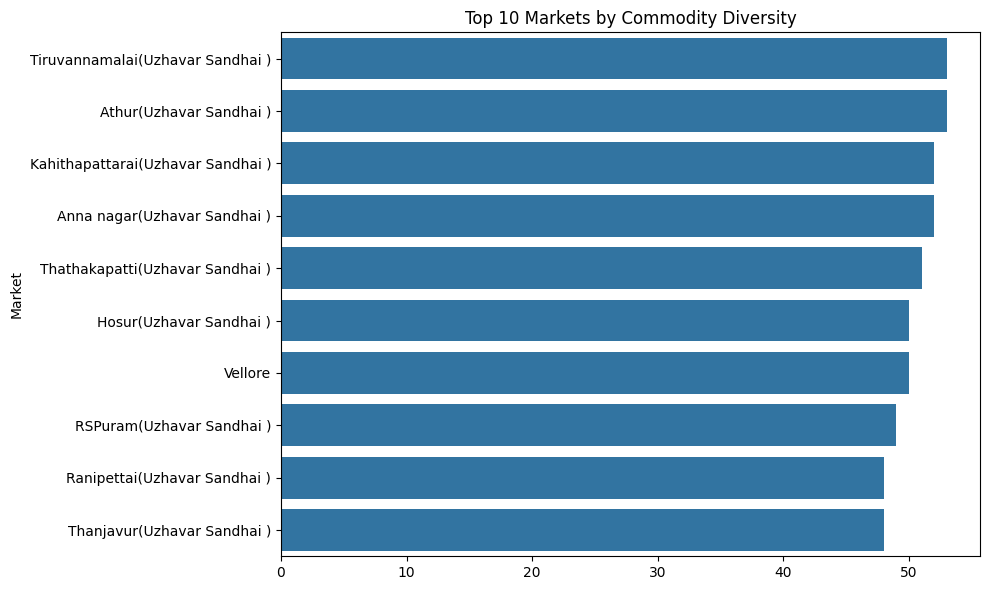

In [22]:
market_diversity = df.groupby('Market')['Commodity'].nunique().sort_values(ascending=False)
print("\nObjective 6: Commodity Diversity by Market")
print(market_diversity.head(10))

plt.figure(figsize=(10,6))
sns.barplot(x=market_diversity.head(10).values, y=market_diversity.head(10).index)
plt.title('Top 10 Markets by Commodity Diversity')
plt.tight_layout()
plt.show()

## Objective 7: Price Range (Volatility) for Selected Commodity
This objective shows the price volatility for the selected commodity by comparing the difference between the max and min prices across states.


Objective 7: Price Range (Volatility) of 'Apple' by State
State
Maharashtra      5750.000000
Haryana          2788.888889
Tamil Nadu       2447.368421
Tripura          2000.000000
Punjab           1700.000000
Uttar Pradesh     283.181818
Kerala            200.000000
Name: Price_Range, dtype: float64


C:\Users\SANCHIT\AppData\Local\Temp\ipykernel_22776\4032016841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected['Price_Range'] = selected['Max_x0020_Price'] - selected['Min_x0020_Price']


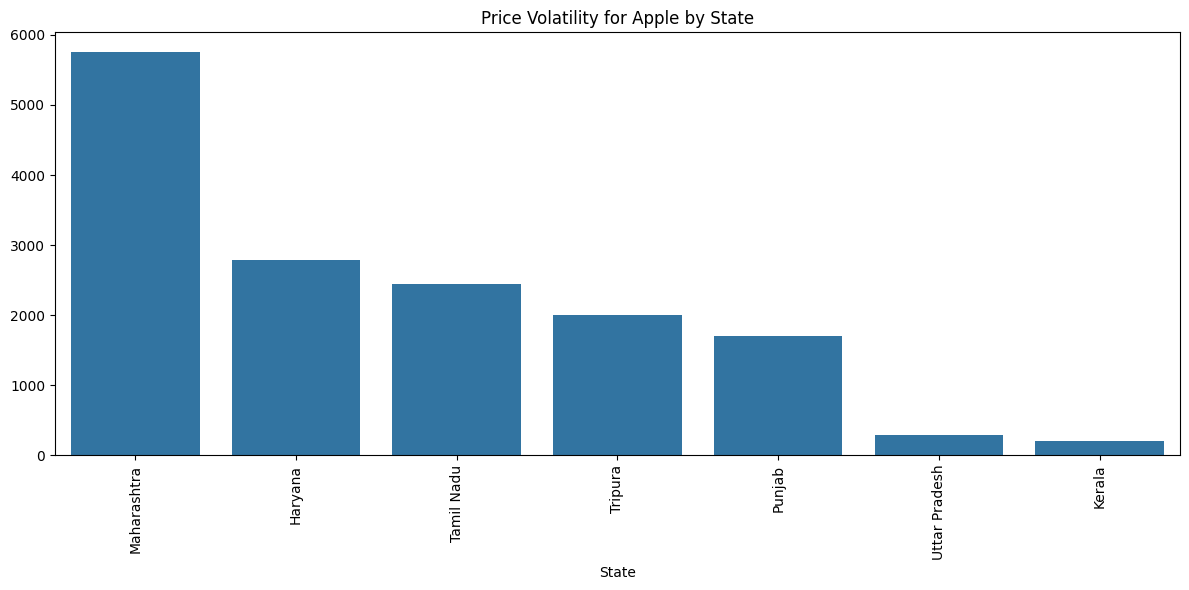

In [23]:
selected['Price_Range'] = selected['Max_x0020_Price'] - selected['Min_x0020_Price']
volatility_by_state = selected.groupby('State')['Price_Range'].mean().sort_values(ascending=False)
print(f"\nObjective 7: Price Range (Volatility) of '{user_input.title()}' by State")
print(volatility_by_state)

plt.figure(figsize=(12,6))
sns.barplot(x=volatility_by_state.index, y=volatility_by_state.values)
plt.title(f'Price Volatility for {user_input.title()} by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Objective 8: State-wise Modal Price for Selected Commodity
This objective shows the average modal price of the selected commodity in different states.


Objective 8: Average Modal Price of 'Apple' by State
State
Tamil Nadu       21973.684211
Kerala           16966.666667
Punjab           14000.000000
Tripura          11000.000000
Haryana           8608.888889
Maharashtra       8125.000000
Uttar Pradesh     7711.636364
Name: Modal_x0020_Price, dtype: float64


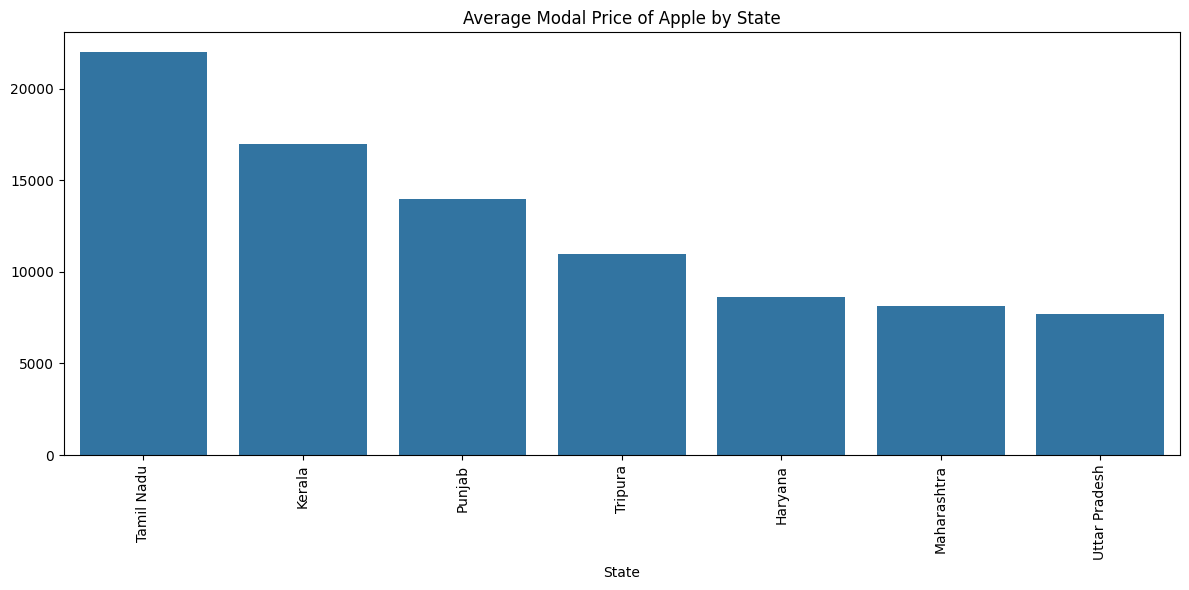

In [24]:
state_price = selected.groupby('State')['Modal_x0020_Price'].mean().sort_values(ascending=False)
print(f"\nObjective 8: Average Modal Price of '{user_input.title()}' by State")
print(state_price)

plt.figure(figsize=(12,6))
sns.barplot(x=state_price.index, y=state_price.values)
plt.title(f'Average Modal Price of {user_input.title()} by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Objective 9: Temporal Trends on 2025-04-06 for Selected Commodity
This objective analyzes the price of the selected commodity on **2025-04-06** across different markets.


Objective 9: Modal Price of 'Apple' Across Markets on 2025-04-06
Market
Anna nagar(Uzhavar Sandhai )          24000.0
Hosur(Uzhavar Sandhai )               24000.0
Mannargudi I(Uzhavar Sandhai )        24000.0
Theni(Uzhavar Sandhai )               24000.0
Ammapet(Uzhavar Sandhai )             22000.0
Chokkikulam(Uzhavar Sandhai )         22000.0
Anaiyur(Uzhavar Sandhai )             22000.0
Kahithapattarai(Uzhavar Sandhai )     22000.0
Vadavalli(Uzhavar Sandhai )           22000.0
Mettur(Uzhavar Sandhai )              22000.0
Kundrathur(Uzhavar Sandhai )          22000.0
Jameenrayapettai(Uzhavar Sandhai )    22000.0
Katpadi (Uzhavar Sandhai )            22000.0
Vellore                               22000.0
Tuticorin(Uzhavar Sandhai )           22000.0
Sampath Nagar(Uzhavar Sandhai )       21500.0
Bhawanigarh                           21500.0
Jalagandapuram(Uzhavar Sandhai )      20000.0
Udhagamandalam(Uzhavar Sandhai )      20000.0
Tiruvarur(Uzhavar Sandhai )           18000.0
Thodupu

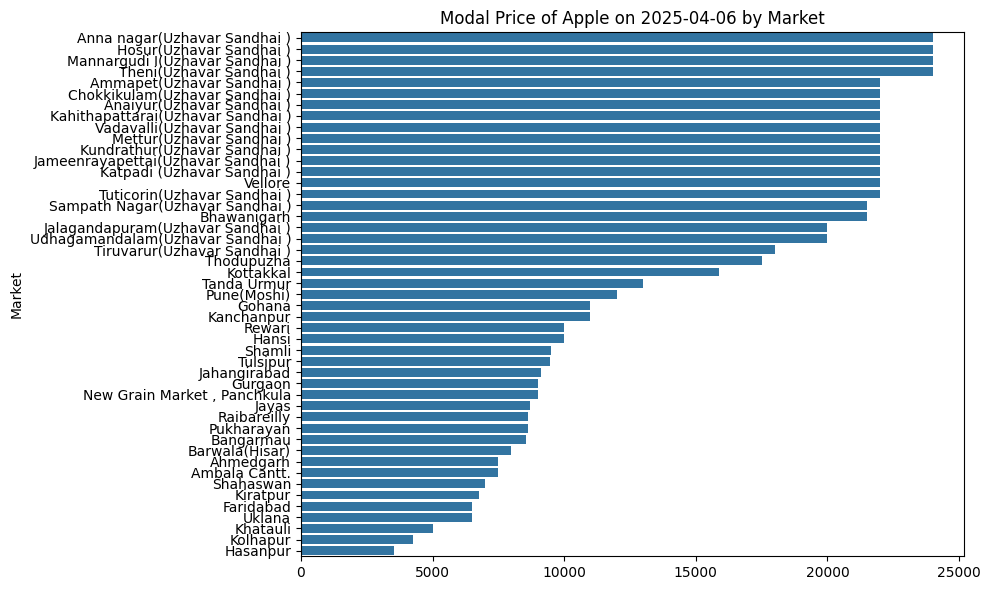

In [25]:
date = pd.to_datetime("2025-04-06")
day_data = selected[selected['Arrival_Date'] == date]
trend = day_data.groupby('Market')['Modal_x0020_Price'].mean().sort_values(ascending=False)
print(f"\nObjective 9: Modal Price of '{user_input.title()}' Across Markets on {date.date()}")
print(trend)

plt.figure(figsize=(10,6))
sns.barplot(x=trend.values, y=trend.index)
plt.title(f'Modal Price of {user_input.title()} on {date.date()} by Market')
plt.tight_layout()
plt.show()

## Objective 10: Commodity Dominance by District
This objective analyzes the most frequently traded commodity in each district.


Objective 10: Most Frequently Traded Commodity by District
        District            Commodity  Count
2029      Ratlam                wheat     12
2106       Salem                onion     11
2157       Seoni                wheat     11
334   Chhatarpur                wheat     10
2193    Shivpuri                wheat     10
...          ...                  ...    ...
156      Barpeta              cabbage      1
141        Banka                onion      1
68        Anupur  paddy(dhan)(common)      1
69        Araria               potato      1
1557     Nalbari         green chilli      1

[208 rows x 3 columns]


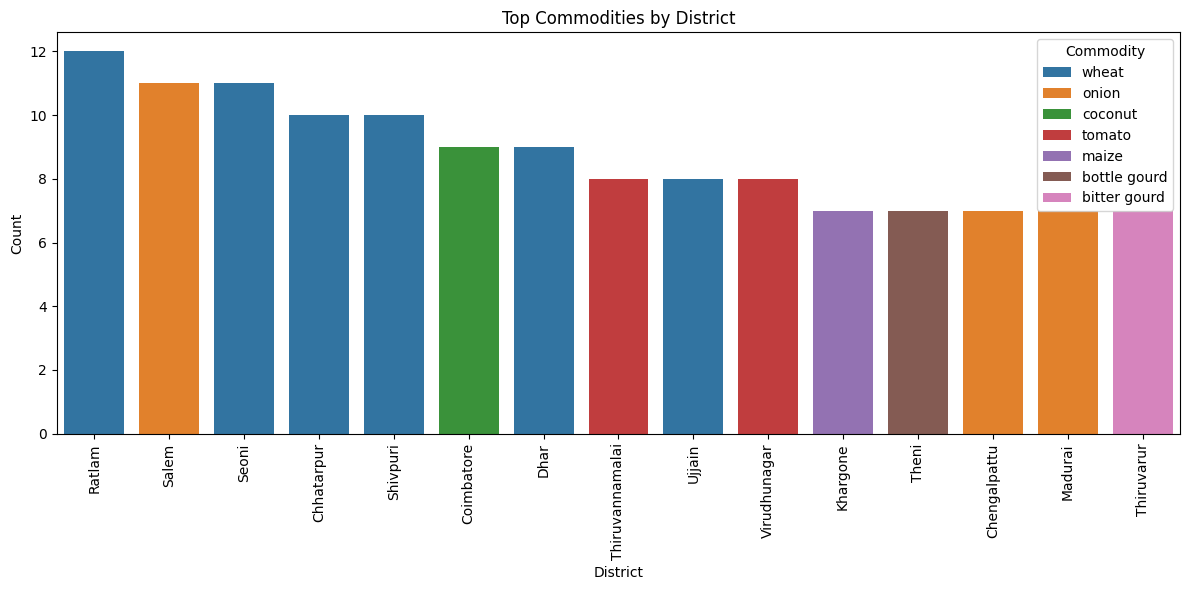

In [26]:
district_commodity = df.groupby(['District', 'Commodity']).size().reset_index(name='Count')
top_commodity_district = district_commodity.sort_values('Count', ascending=False).drop_duplicates('District')
print("\nObjective 10: Most Frequently Traded Commodity by District")
print(top_commodity_district)

plt.figure(figsize=(12,6))
sns.barplot(data=top_commodity_district.sort_values('Count', ascending=False).head(15), x='District', y='Count', hue='Commodity')
plt.title('Top Commodities by District')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()